In [1]:
ls

1-fold_loss_df.csv  4-fold_loss_df.csv   test_recording_df.csv
2-fold_loss_df.csv  plot_loss.ipynb
3-fold_loss_df.csv  test_patient_df.csv


In [ ]:
import pathlib
import pandas as pd 
import matplotlib.pyplot as plt

path = pathlib.Path("/Data1/hmd2/notebooks_th/GRU_loss_add/models/2024-09-08_20:37:33/dataframes/")

In [16]:
def plot_loss_function(df: pd.DataFrame, num_subplot: int):
    fig, axs = plt.subplots(num_subplot, 1, figsize=(6,8))

    num_epochs = df.shape[0]

    axs[0].plot(range(1, num_epochs + 1), df['Train_total_loss'], label='Train_total_Loss')
    axs[0].plot(range(1, num_epochs + 1), df['Val_total_loss'], label='Val_total_Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].set_title('Total Loss')
    axs[0].legend()

    axs[1].plot(range(1, num_epochs + 1), df['Train_seq_loss'], label='Train seq Loss')
    axs[1].plot(range(1, num_epochs + 1), df['Val_seq_loss'], label='Validation seq Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].set_title('Seq Loss')
    axs[1].legend()

    axs[2].plot(range(1, num_epochs + 1), df['Train_murmur_loss'], label='Train Murmur Loss')
    axs[2].plot(range(1, num_epochs + 1), df['Val_murmur_loss'], label='Validation Murmur Loss')
    axs[2].set_xlabel('Epoch')
    axs[2].set_ylabel('Loss')
    axs[2].set_title('Murmur Loss')
    axs[2].legend()
    
    plt.tight_layout()
    plt.show()

In [17]:
fold_one_loss_df = pd.read_csv(path / "1-fold_loss_df.csv")
fold_two_loss_df = pd.read_csv(path / "2-fold_loss_df.csv")
fold_three_loss_df = pd.read_csv(path / "3-fold_loss_df.csv")
fold_four_loss_df = pd.read_csv(path / "4-fold_loss_df.csv")

fold_one_loss_df.head()

,Unnamed: 0,Train_total_loss,Train_seq_loss,Train_murmur_loss,Val_total_loss,Val_seq_loss,Val_murmur_loss
0,0,0.762923,0.226435,0.536489,0.703683,0.226278,0.477405
1,1,0.724371,0.226162,0.498209,0.697842,0.226054,0.471788
2,2,0.718058,0.225989,0.492069,0.694994,0.225879,0.469115
3,3,0.715962,0.225870,0.490092,0.694240,0.225766,0.468474
4,4,0.714286,0.225789,0.488497,0.692582,0.225678,0.466905


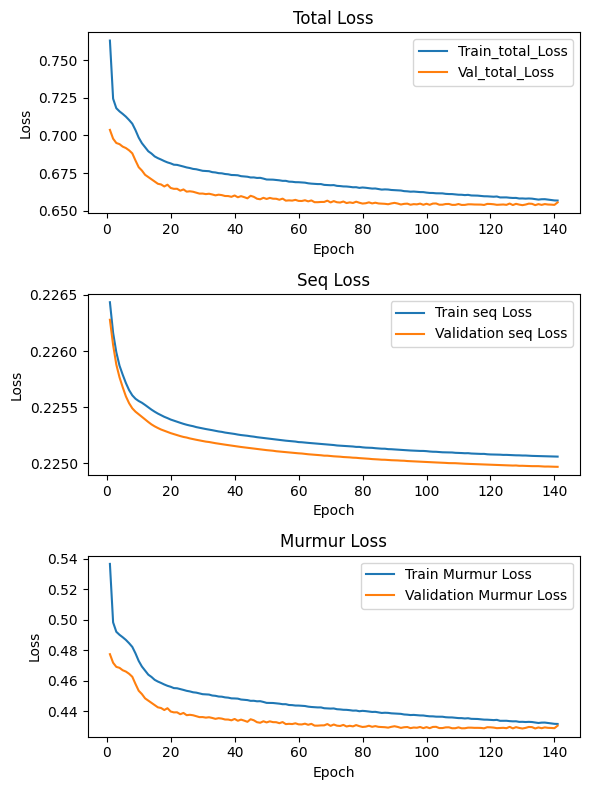

In [18]:
plot_loss_function(fold_one_loss_df, 3)

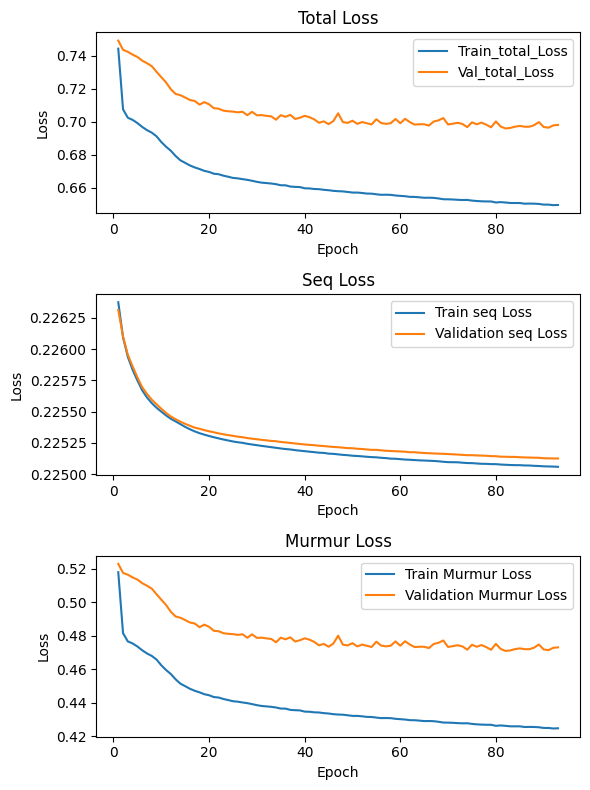

In [19]:
plot_loss_function(fold_two_loss_df, 3)

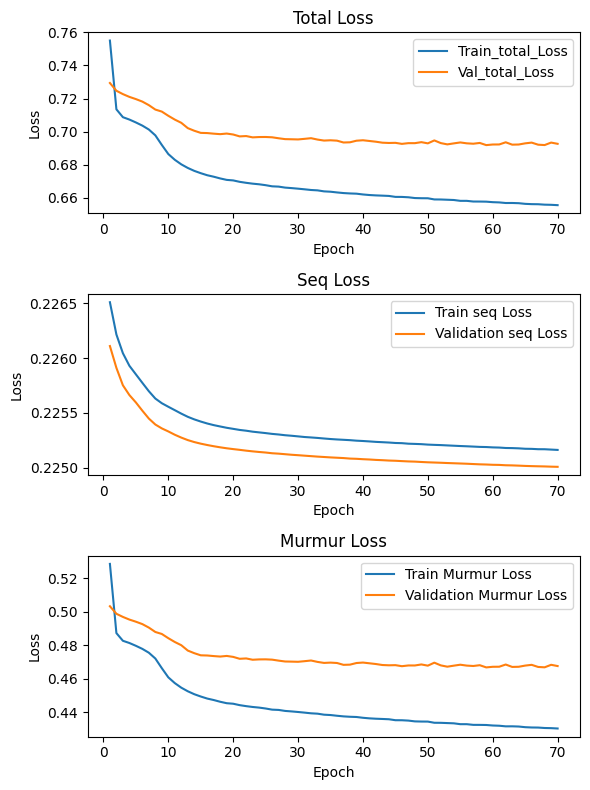

In [20]:
plot_loss_function(fold_three_loss_df, 3)

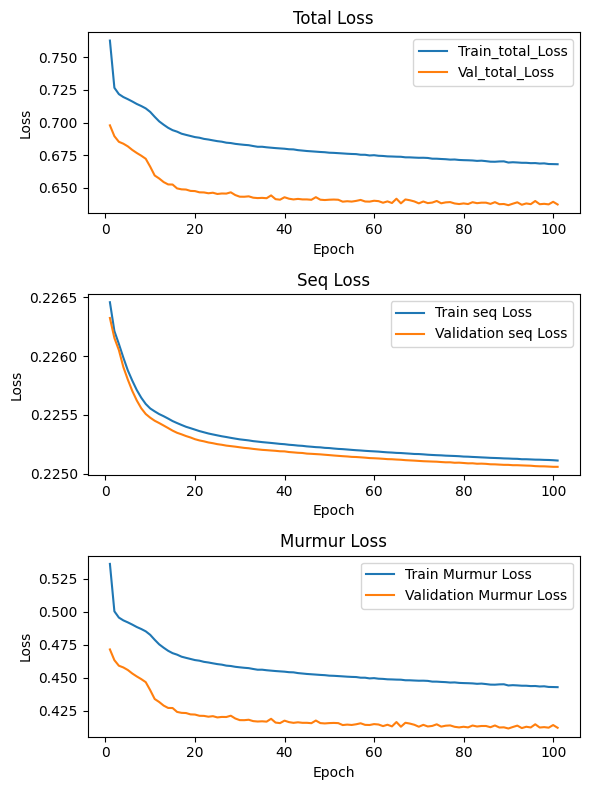

In [21]:
plot_loss_function(fold_four_loss_df, 3)

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F

crit = nn.BCELoss()

pred = torch.zeros(100, 2)
pred[:, 0] = 1.0

label = torch.zeros(100, 2)
label[:, 0] = 1.0


# random_index = torch.randint(low=0, high=100, size= (100,))

random_index = torch.randperm(100)[:100]
pred[random_index, 1] = 1.0

# pred[random_index, 1] = 1.0

loss = crit(pred, label)
loss.item()

50.0

tensor(49.5000)

In [43]:
a = torch.randn(10)
a

tensor([-0.8471, -1.3523, -2.0184, -0.5189,  0.4145,  0.4847,  0.3476,  0.5352,
         0.5469,  0.3268])

In [44]:
random_index = torch.randperm(9)[:10]
a[random_index], random_index

(tensor([ 0.4847, -0.5189,  0.4145, -2.0184,  0.5352,  0.5469, -1.3523,  0.3476,
         -0.8471]),
 tensor([5, 3, 4, 2, 7, 8, 1, 6, 0]))

In [37]:
random_index

tensor([61,  7,  6, 63, 22, 90, 83, 59, 28, 66, 38, 74, 80, 40, 49, 88, 81, 15,
        10, 51, 94, 72, 54, 45, 27, 95, 93, 47, 73, 96, 19,  3,  9, 85, 56, 87,
        30, 57,  2, 24, 58, 14, 52, 84,  8, 44, 29, 42, 92, 43, 75, 20, 76,  0,
        25, 50, 46, 65, 69, 18, 60, 12,  1, 34, 55, 17, 79, 67, 78, 91, 13, 32,
        99, 82, 70, 98, 97, 41, 62, 89, 53,  5, 11, 16, 31, 26, 39, 86, 64, 36,
        33, 23, 71, 35, 21, 48,  4, 77, 68, 37])

In [24]:
F.sigmoid(torch.ones(1) * -100)

tensor([0.])